# read business and review data

In [300]:
from os import listdir
from os.path import isfile, join
import json
import csv
import pandas as pd
import numpy as np

All datasets were released in March, 2020, except for Covid-19, which was released in June, 2020

In [3]:
mypath = "yelp_dataset"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['business.json', 'covid.json', 'review.json', 'tip.json', 'user.json']

In [4]:
# for names in onlyfiles:
#     exec("{} = []".format(names[:-5]))
#     f = open(mypath+'/'+names, 'r', encoding='utf-8')
#     for line in f:
#         exec("{}.append(json.loads(line))".format(names[:-5]))
#     f.close() 

#     # now we will open a file for writing
#     data_file = open(names[:-5]+'.csv', 'w', encoding='utf-8')

#     # create the csv writer object
#     csv_writer = csv.writer(data_file)

#     # Counter variable used for writing
#     # headers to the CSV file
#     count = 0

#     for emp in locals().get(names[:-5]):
#         if count == 0:

#             # Writing headers of CSV file
#             header = emp.keys()
#             csv_writer.writerow(header)
#             count += 1

#         # Writing data of CSV file
#         csv_writer.writerow(emp.values())

#     data_file.close()

In [5]:
# for names in onlyfiles:
#     exec("{} = []".format(names[:-5]))
#     f = open(mypath+'/'+names, 'r', encoding='utf-8')
#     count = 0
#     for line in f:
#         exec("{}.append(json.loads(line))".format(names[:-5]))
#         count += 1
#         if count == 10000:
#             break
        
#     f.close() 


In [7]:
business = []
f =  open(mypath+'/'+'business.json', 'r', encoding='utf-8')
for line in f:
    business.append(json.loads(line))
f.close()
business_df = pd.DataFrame(business)

In [25]:
business[0]

{'business_id': '6iYb2HFDywm3zjuRg0shjw',
 'name': 'Oskar Blues Taproom',
 'address': '921 Pearl St',
 'city': 'Boulder',
 'state': 'CO',
 'postal_code': '80302',
 'latitude': 40.0175444,
 'longitude': -105.2833481,
 'stars': 4.0,
 'review_count': 86,
 'is_open': 1,
 'attributes': {'RestaurantsTableService': 'True',
  'WiFi': "u'free'",
  'BikeParking': 'True',
  'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
  'BusinessAcceptsCreditCards': 'True',
  'RestaurantsReservations': 'False',
  'WheelchairAccessible': 'True',
  'Caters': 'True',
  'OutdoorSeating': 'True',
  'RestaurantsGoodForGroups': 'True',
  'HappyHour': 'True',
  'BusinessAcceptsBitcoin': 'False',
  'RestaurantsPriceRange2': '2',
  'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
  'HasTV': 'True',
  'Alcohol': "'beer_and_wine'",
  'GoodFo

In [6]:
# names = []
# for name in onlyfiles:
#     names.append(name[:-5])

In [7]:
# for name in names:
#     exec("{}_df = pd.DataFrame({})".format(name, name))

only business has nan values

In [529]:
business_df.loc[business_df.isna().sum(axis=1)>=1,:].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
18,6fT0lYr_UgWSCZs_w1PBTQ,Salter School,2 Florence St,Malden,MA,02148,42.427889,-71.073475,2.0,5,1,None,"Specialty Schools, Massage Schools, Middle Sch...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
19,dmbbf3AqeG61_QHRZi1M1w,RaceTrac,350 W Sand Lake Rd,Pine Castle,FL,32809,28.450302,-81.380587,3.5,5,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Automotive, American (Traditional), Gas Statio...",None
21,AvT2mGkdYwU0ghqDfs-OlQ,Tire Town Auto Service,2032 Hastings Street E,Vancouver,BC,V5L 1T8,49.281059,-123.063019,4.0,6,0,None,"Auto Repair, Automotive, Tires","{'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'..."


## covid descriptions
    1.highlights: FALSE or dict
    2.delivery or takeout: FALSE or TRUE
    3.Grubhub enabled: FALSE or TRUE
    4.Request a Quote Enabled: FALSE or TRUE
    5.Covid Banner: FALSE or banner text
    5.Temporary Closed Until: FALSE or time
    6.Virtual Services Offered: FALSE or offer some services (different types)

## find business: oasis

In [7]:
business_df.loc[118766, :]

business_id                                Z5Oc3lC-NAhbmfVfRnwSzQ
name                                     The OASIS on Lake Travis
address                                         6550 Comanche Trl
city                                                       Austin
state                                                          TX
postal_code                                                 78732
latitude                                                30.405899
longitude                                              -97.873952
stars                                                         2.5
review_count                                                 2532
is_open                                                         1
attributes      {'BusinessAcceptsCreditCards': 'True', 'HasTV'...
categories      Wedding Planning, Tex-Mex, Event Planning & Se...
hours           {'Monday': '0:0-0:0', 'Tuesday': '11:30-16:0',...
Name: 118766, dtype: object

In [8]:
id = business_df.loc[118766, 'business_id']
id

'Z5Oc3lC-NAhbmfVfRnwSzQ'

## get reviews about The OASIS on Lake Travis

In [62]:
TOOLT_review = []
f = open(mypath+'/'+'review.json', 'r', encoding='utf-8')
count = 0
for line in f:
    temp = json.loads(line)
    if temp['business_id']==id:
        count += 1
        TOOLT_review.append(temp)
f.close() 

In [63]:
count

2578

In [64]:
TOOLT_review_df = pd.DataFrame(TOOLT_review)
TOOLT_review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,PpiVsfKBuHHrtk3v9GqStw,8wHfZSoU-jo3TwegBg_aPg,Z5Oc3lC-NAhbmfVfRnwSzQ,3.0,0,0,0,My family and I decided to have a late lunch a...,2017-02-19 07:02:42
1,jMTYIk4zHU3Rr5AYX5LBiw,J9mTwl4sh0HT_KeS-bd2YA,Z5Oc3lC-NAhbmfVfRnwSzQ,1.0,1,0,0,I wanted to like this place based on the stunn...,2017-07-08 17:25:57
2,H5LxoZBkrSA4VntAtNzv0w,DTGOyVfBNUgXuaIoM-rwmw,Z5Oc3lC-NAhbmfVfRnwSzQ,2.0,2,1,0,"The food was boring, flavorless, and uncreativ...",2012-06-26 02:16:30
3,luEt10kIVpN1HXEWvg1i7A,pBERtKTtg6T-ViVQzccZ-w,Z5Oc3lC-NAhbmfVfRnwSzQ,2.0,2,2,1,"Beautiful, beautiful views. That's about the ...",2012-08-15 04:21:09
4,zbJ7-mKk4GGBWHF6EGSRsg,BNXHFDcVRX8DcmEzE_VGWQ,Z5Oc3lC-NAhbmfVfRnwSzQ,3.0,0,0,0,Eh...okay but ya gotta be there at just the ri...,2017-06-27 22:45:45


In [40]:
TOOLT_review_df.to_csv("TOOLT_review.csv")

## get tips about The OASIS on Lake Travis

In [10]:
TOOLT_tips = []
f = open(mypath+'/'+'tip.json', 'r', encoding='utf-8')
count = 0
for line in f:
    temp = json.loads(line)
    if temp['business_id']==id:
        count += 1
        TOOLT_tips.append(temp)
f.close() 

In [14]:
print(count)
TOOLT_tips_df = pd.DataFrame(TOOLT_tips)
TOOLT_tips_df.head()

260


,user_id,business_id,text,date,compliment_count
0,Ult681KMSYmgJZBGYlhFwg,Z5Oc3lC-NAhbmfVfRnwSzQ,They now have more than one wine option (thank...,2012-03-17 00:35:18,0
1,0WkwmWIfIzE83EwHIo0qWw,Z5Oc3lC-NAhbmfVfRnwSzQ,Spectacular views but slow service and mediocr...,2015-09-01 03:43:06,0
2,abkz8s2Hr7mLCwdKUxoSTA,Z5Oc3lC-NAhbmfVfRnwSzQ,Sure its got spectacular views but thats about...,2017-04-21 23:53:29,0
3,IRh5_v4J_BlXo9DJjH2UWw,Z5Oc3lC-NAhbmfVfRnwSzQ,"Long wait, shortened menu, $1MM view. Experie...",2016-07-25 19:58:46,0
4,Xur2--Cl5j1_eA8ZjZzhsg,Z5Oc3lC-NAhbmfVfRnwSzQ,breathtakingly beautiful!,2013-03-19 23:49:18,0


In [15]:
TOOLT_tips_df.to_csv("TOOLT_tip.csv")

## get related businesses and their reviews(aren't used in the following code)

In [23]:
TOOLT = business_df.loc[118766, ]
print(TOOLT.categories)
print(TOOLT.attributes)

Wedding Planning, Tex-Mex, Event Planning & Services, Venues & Event Spaces, Seafood, Restaurants, American (Traditional), Breakfast & Brunch, Local Flavor
{'BusinessAcceptsCreditCards': 'True', 'HasTV': 'True', 'RestaurantsTakeOut': 'True', 'GoodForKids': 'True', 'RestaurantsAttire': "'casual'", 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'True', 'BikeParking': 'True', 'Alcohol': "'full_bar'", 'Caters': 'True', 'BusinessParking': "{'garage': True, 'street': False, 'validated': False, 'lot': True, 'valet': True}", 'BYOBCorkage': "'no'", 'WiFi': "u'no'", 'Corkage': 'False', 'RestaurantsTableService': 'True', 'NoiseLevel': "u'average'", 'HappyHour': 'False', 'Ambience': "{'touristy': True, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}", 'GoodForMeal': "{'dessert': None, 'latenight': False, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast

In [37]:
restaurants_list = []
count = 0
for temp in business:
    if temp['categories'] is None:
        continue
    if 'Restaurant' in temp['categories']:
        count += 1
        restaurants_list.append(temp)
print(count)

50793


In [48]:
Restaurants_and_planing_list = []
count = 0
for temp in business:
    if temp['categories'] is None:
        continue
    if 'Restaurant' in temp['categories'] and 'Plan' in temp['categories']:
        count += 1 
        Restaurants_and_planing_list.append(temp)
print(count)

2659


In [47]:
Wedding_planing_list = []
count = 0
for temp in business:
    if temp['categories'] is None:
        continue
    if 'Wedding' in temp['categories']:
        count += 1 
        Wedding_planing_list.append(temp)
print(count)

736


In [58]:
Restaurants_and_planing_list_df = pd.DataFrame(Restaurants_and_planing_list)
list_ID = Restaurants_and_planing_list_df.business_id
Restaurants_and_planning_reviews = []
f = open(mypath+'/'+'review.json', 'r', encoding='utf-8')
count = 0
for line in f:
    temp = json.loads(line)
    if list_ID.eq(temp['business_id']).any():
        count += 1
        Restaurants_and_planning_reviews.append(temp)
f.close() 

In [59]:
count

405482

## word segregation

In [245]:
import re 
from PIL import Image
import matplotlib.font_manager as fm
from wordcloud import WordCloud,ImageColorGenerator
from snownlp import SnowNLP
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
import seaborn as sns
import math
from googletrans import Translator

In [260]:
TOOLT_review_df.text = TOOLT_review_df.text.apply(lambda s: re.sub(r'[0-9!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n]', ' ', s))
words = set(nltk.corpus.words.words())
TOOLT_review_df.text = TOOLT_review_df.text.apply(lambda s: " ".join(w for w in nltk.wordpunct_tokenize(s) if w.lower() in words or not w.isalpha()))


In [457]:
stemmer = SnowballStemmer("english")
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append(['.',',','us','...','!', 'x x x x','x x x x x'])
tknzr = TweetTokenizer()#different tokenizer
def get_freq(corpus_review):
    freq = {}
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for s in symbols:
        corpus_review=corpus_review.replace("s", " ")
    corpus_review=corpus_review.replace("x x x x", "")
    corpus_review=corpus_review.replace("x x x x x", "")
    words_token = tknzr.tokenize(corpus_review)
    for word in words_token:
        if len(word) == 1 or word in stopwords:
            continue
        else:
#             word = stemmer.stem(word)
            word = word.lower()
            freq[word] = freq.get(word,0) + 1
    return freq

In [117]:
def freq_matrix(text_list, key_list):
    freq_matrix = {}
    for text, key in zip(text_list, key_list):
        freq_matrix[key] = get_freq(text)
    return freq_matrix

In [498]:
def create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = sum(f_table.values())
        for word, count in f_table.items():
            tf_table[word] = np.arctan(count / count_words_in_sentence)

        tf_matrix[sent] = tf_table

    return tf_matrix

In [519]:
def create_idf_matrix(freq_matrix,  total_documents):
    idf_matrix = {}
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(word_per_doc_table[word]))**2

        idf_matrix[sent] = idf_table

    return idf_matrix

In [520]:
def create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [521]:
# Restaurants_and_planning_reviews_df = pd.DataFrame(Restaurants_and_planning_reviews)
# reviews_by_restaurants = Restaurants_and_planning_reviews_df.groupby('business_id')['text'].apply(lambda x: "".join(x)).to_dict()
# freq_by_res = freq_matrix(reviews_by_restaurants.values(), reviews_by_restaurants.keys())
# Res_tf = create_tf_matrix(freq_by_res)
# Res_idf = create_idf_matrix(freq_by_star, len(reviews_by_restaurants))
# Res_weight = create_tf_idf_matrix(Res_tf, Res_idf)

In [522]:
reviews_by_stars = TOOLT_review_df.groupby('stars')['text'].apply(lambda x: "".join(x)).to_dict()
freq_by_res = freq_matrix(TOOLT_review_df.text, TOOLT_review_df.review_id)
Res_tf = create_tf_matrix(freq_by_res)
Res_idf = create_idf_matrix(freq_by_res, len(TOOLT_review_df))
Res_weight = create_tf_idf_matrix(Res_tf, Res_idf)

In [523]:
Res_weight_df = pd.DataFrame(Res_weight).T
len(Res_weight_df)

2578

In [524]:
Res_weight_df.head()

,my,family,decided,late,lunch,thi,wonderful,pot,lake,travi,...,say,thoughtful,gari,laughter,aggravation,advanced,fixable,chained,boardwalk,abruptly
PpiVsfKBuHHrtk3v9GqStw,0.008882,0.015905,0.02147,0.041565,0.018895,0.001244,0.025273,0.019716,0.008568,0.008625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jMTYIk4zHU3Rr5AYX5LBiw,NaN,NaN,NaN,NaN,NaN,0.003498,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H5LxoZBkrSA4VntAtNzv0w,NaN,NaN,NaN,NaN,NaN,0.002153,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
luEt10kIVpN1HXEWvg1i7A,NaN,NaN,NaN,NaN,NaN,0.002074,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zbJ7-mKk4GGBWHF6EGSRsg,NaN,NaN,NaN,0.101083,NaN,NaN,NaN,NaN,0.010420,0.020976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [525]:
TOOLT_review_df['starofreviews'] = TOOLT_review_df.stars
Res_weight_df = pd.merge(Res_weight_df.reset_index(),
                         TOOLT_review_df[['review_id', 'starofreviews']], 
                         left_on='index', right_on='review_id')

In [526]:
Res_weight_df = Res_weight_df.drop(['review_id','index'], axis = 1)
Star_Res = Res_weight_df.groupby('starofreviews').sum()

In [527]:
Star_Res

,my,family,decided,late,lunch,thi,wonderful,pot,lake,travi,...,say,thoughtful,gari,laughter,aggravation,advanced,fixable,chained,boardwalk,abruptly
starofreviews,,,,,,,,,,,,,,,,,,,,,
1.0,1.450007,1.171916,1.079106,0.732729,0.788456,1.366867,0.473802,0.608123,0.943716,0.816600,...,0.000000,0.000000,0.375252,0.264428,0.264428,0.126483,0.088829,0.000000,0.000000,0.000000
2.0,1.095756,0.733507,0.781426,0.285589,0.649368,0.922696,0.257244,1.375650,1.277389,1.031314,...,0.076557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.934412,0.762804,0.260195,0.413840,0.674556,0.655723,1.181547,1.341319,1.644959,1.561741,...,0.000000,0.447351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,0.875281,1.106057,0.499754,0.048161,2.003368,0.725364,1.216661,1.497268,1.890062,2.130551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187675,0.000000,0.000000
5.0,1.008896,1.498046,0.402815,0.108672,0.999253,0.467917,2.501893,0.710870,1.024419,1.344219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.829794,0.176302


In [528]:
def most_common(series):
    print(series.keys()[np.argsort(series.values)][::-1])
    
Star_Res.apply(most_common, axis = 1)

Index(['horrible', 'terrible', 'wor', 'rude', 'awful', 'never', 'bad',
       'manager', 'hour', 'ever',
       ...
       'naming', 'executive', 'inging', 'toppable', 'neaky', 'extended',
       'bomb', 'grapefruit', 'ador', 'gladly'],
      dtype='object', length=5309)
Index(['mediocre', 'tar', 'quality', 'two', 'priced', 'wor', 'bland', 'you',
       'much', 'not',
       ...
       'liqueur', 'unaware', 'nag', 'memo', 'sipper', 'elder', 'seek', 'flare',
       'twin', 'abruptly'],
      dtype='object', length=5309)
Index(['average', 'simply', 'but', 'crown', 'great', 'pretty', 'better', 'un',
       'worth', 'fun',
       ...
       'ga', 'school', 'upset', 'walker', 'pitch', 'irable', 'farce', 'urface',
       'population', 'gladly'],
      dtype='object', length=5309)
Index(['love', 'amazing', 'definitely', 'fun', 'phere', 'atmo', 'awe', 'travi',
       'mu', 'alway',
       ...
       'knowledge', 'inside', 'worn', 'hift', 'tandem', 'randomly',
       'apartment', 'maul', 'rim',

starofreviews
1.0    None
2.0    None
3.0    None
4.0    None
5.0    None
dtype: object

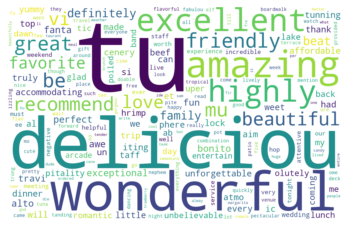

In [549]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", width=1500, height=960, margin=10)
wordcloud.generate_from_frequencies(frequencies=Star_Res.loc[5].to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [550]:
plt.savefig('wordcloud_5star.png')

<Figure size 432x288 with 0 Axes>

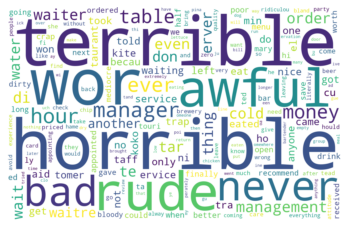

In [551]:
wordcloud = WordCloud(background_color="white", width=1500, height=960, margin=10)
wordcloud.generate_from_frequencies(frequencies=Star_Res.loc[1].to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [552]:
plt.savefig('wordcloud_1star.png')

<Figure size 432x288 with 0 Axes>